/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


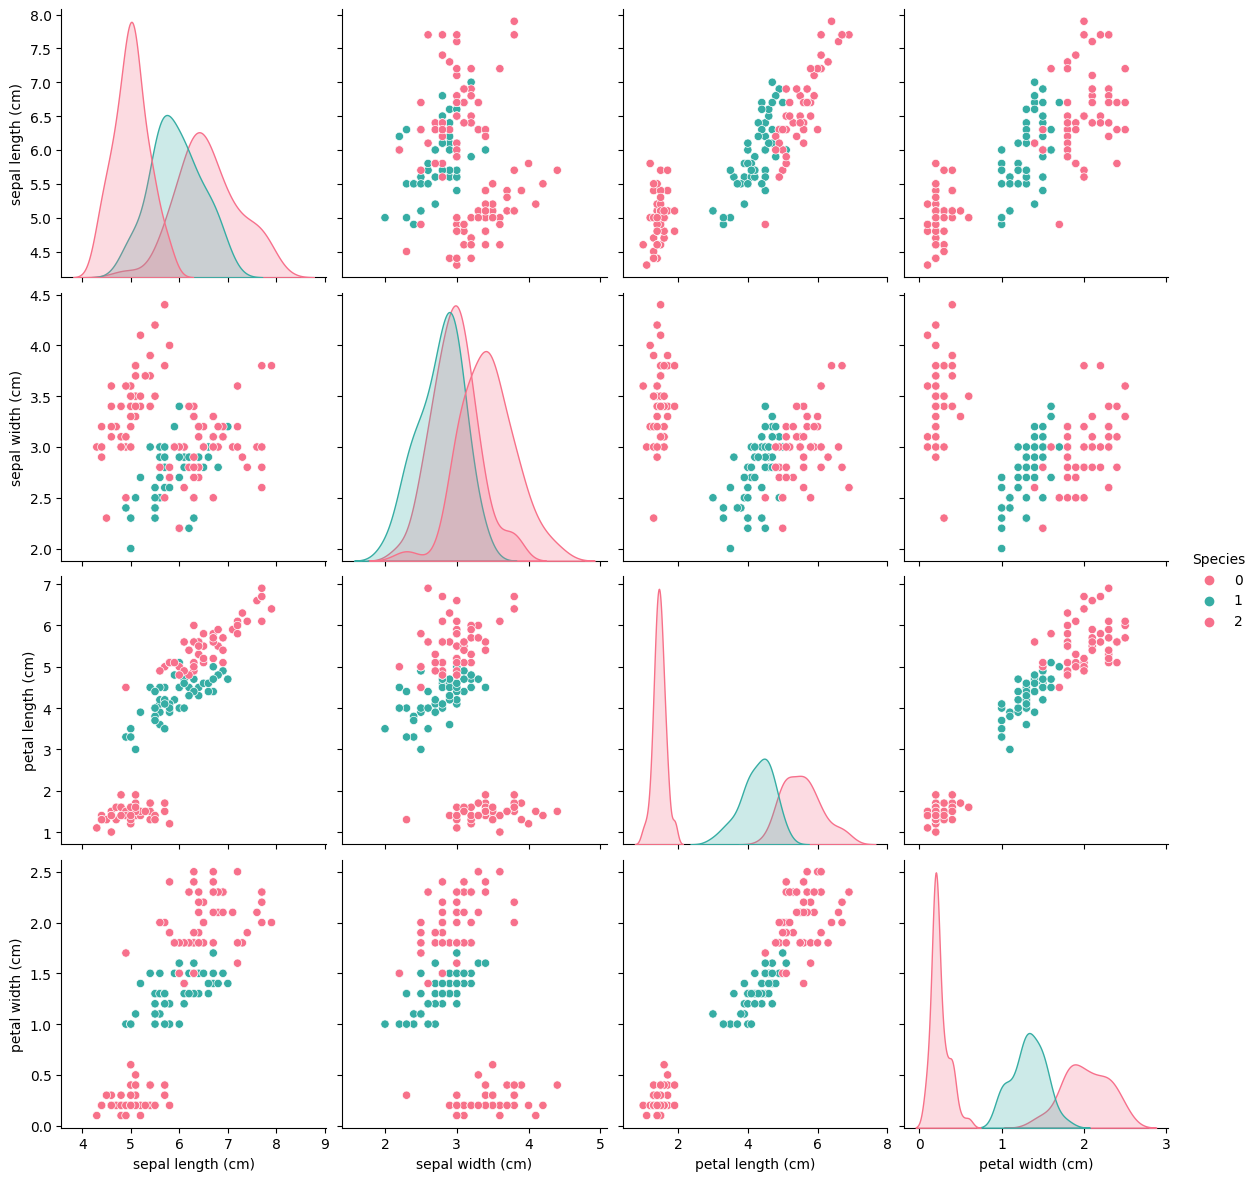

<ipython-input-2-be2081b37173>:42: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataframe.data = features_data
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


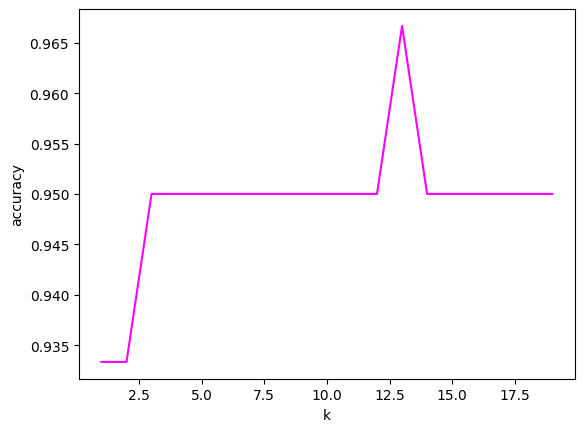

0.9666666666666667


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import datasets

MAX_NEIGHBOURS = 20
TEST_SIZE = 0.4

class KNeighboursClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, features, labels):
        self.training_features = features
        self.training_labels = labels

    def score(self, features, true_labels):
        predicted_labels = self.predict(features)
        return np.sum(predicted_labels == true_labels) / len(true_labels)

    def predict(self, features):
        nearest_neighbours = []
        for feature_vector in features:
            distances = np.sqrt(np.sum((feature_vector - self.training_features) ** 2, axis=1))
            sorted_labels = [label for _, label in sorted(zip(distances, self.training_labels))]
            nearest_neighbours.append(sorted_labels[:self.k])
        return list(map(lambda x: Counter(x).most_common(1)[0][0], nearest_neighbours))

def main():
    iris_dataset = datasets.load_iris()
    target_values = iris_dataset.target
    dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
    dataframe['Species'] = target_values
    features_data = iris_dataset.get('data')
    sns.pairplot(dataframe, hue="Species", size=3, palette="husl")
    plt.show()

    normalize(features_data)
    dataframe.data = features_data
    sns.pairplot(dataframe, hue="Species", size=3, palette="husl")
    plt.show()

    labels = iris_dataset.get('target')
    train_features, test_features, train_labels, test_labels = train_test_split(features_data, labels, test_size=TEST_SIZE)

    accuracies = []
    for neighbours_count in range(1, MAX_NEIGHBOURS):
        classifier = KNeighboursClassifier(k=neighbours_count)
        classifier.fit(train_features, train_labels)
        accuracy = classifier.score(test_features, test_labels)
        accuracies.append(accuracy)
    fig, axis = plt.subplots()
    axis.plot(range(1, MAX_NEIGHBOURS), accuracies, color='magenta')
    axis.set(xlabel="k", ylabel="accuracy")
    plt.show()

    max_accuracy = np.array(accuracies).max()
    print(max_accuracy)

def normalize(data):
    for index in range(len(data[0])):
        column_values = [row[index] for row in data]
        min_val = np.min(column_values)
        max_val = np.max(column_values)
        for row in data:
            row[index] = (row[index] - min_val) / (max_val - min_val)

if __name__ == "__main__":
    main()
